<a href="https://colab.research.google.com/github/Seyoung-Jung/Tobigs-HW/blob/master/week4/Ensemble/Assignment_Kaggle_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  1. Data Loading



In [1]:
# ready
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# visualization
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
%matplotlib inline

In [3]:
# Load Data
train = pd.read_csv('/content/drive/My Drive/Tobigs/week4_Ensemble/ggstore_train.csv')
test = pd.read_csv('/content/drive/My Drive/Tobigs/week4_Ensemble/ggstore_test.csv')

## 2. EDA & Data Processing


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             5616 non-null   object 
 1   Category        5616 non-null   object 
 2   Rating          5616 non-null   float64
 3   Reviews         5616 non-null   int64  
 4   Size            5616 non-null   float64
 5   Installs        5616 non-null   float64
 6   Type            5616 non-null   int64  
 7   Price           5616 non-null   float64
 8   Content Rating  5616 non-null   object 
 9   Genres          5616 non-null   object 
 10  Last Updated    5616 non-null   object 
 11  Id              5616 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 526.6+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1404 non-null   object 
 1   Category        1404 non-null   object 
 2   Reviews         1404 non-null   int64  
 3   Size            1404 non-null   float64
 4   Installs        1404 non-null   float64
 5   Type            1404 non-null   int64  
 6   Price           1404 non-null   float64
 7   Content Rating  1404 non-null   object 
 8   Genres          1404 non-null   object 
 9   Last Updated    1404 non-null   object 
 10  Id              1404 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 120.8+ KB


#### 연속형 변수

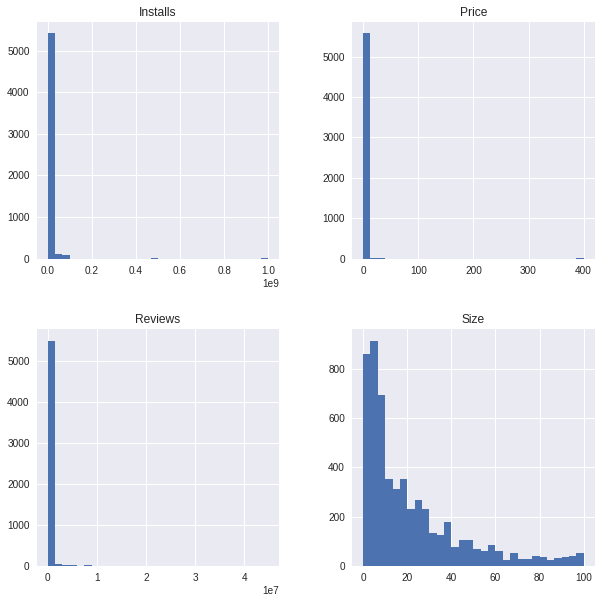

In [4]:
# 연속형 변수 분포 확인
continuous = train[['Reviews','Size','Installs','Price']]
continuous.hist(bins=30,figsize=(10,10))
plt.show()

Size는 값이 넓게 퍼져있고, 나머지는 매우 좁은 분포를 띄고 있다.

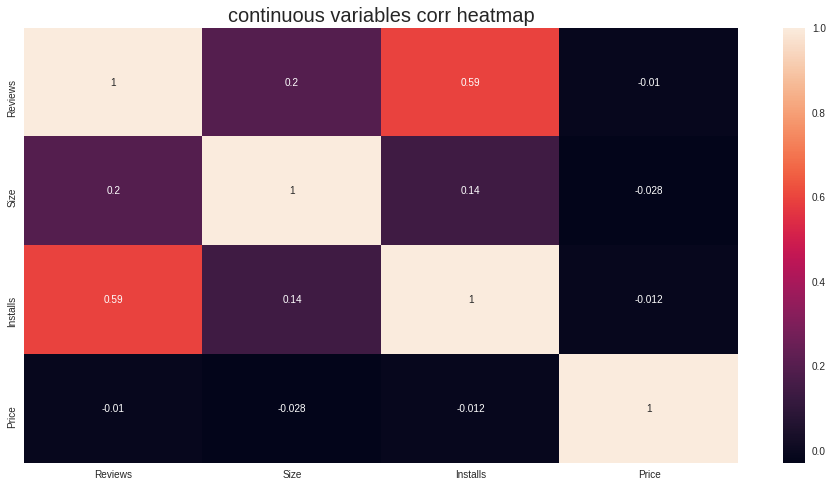

In [ ]:
# 연속형 변수 heatmap 상관관계 시각화
plt.figure(figsize=(16,8))
sns.heatmap(continuous.corr(), annot=True)
plt.title('continuous variables corr heatmap', fontsize=20)

plt.show()

연속형 변수들 간에 0.6을 넘는 상관관계는 보이지 않으므로 문제 없다고 판단한다.

### 연속형 변수 이상치 확인


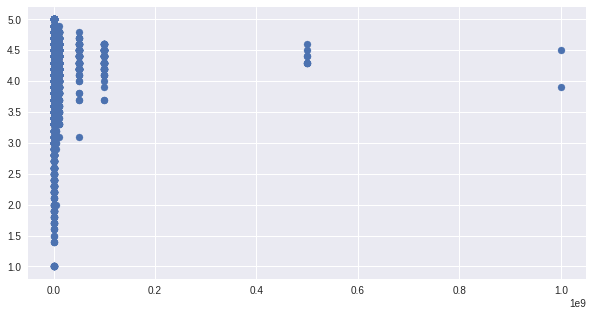

In [ ]:
# Installs
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['Installs'], y = continuous['Rating'])

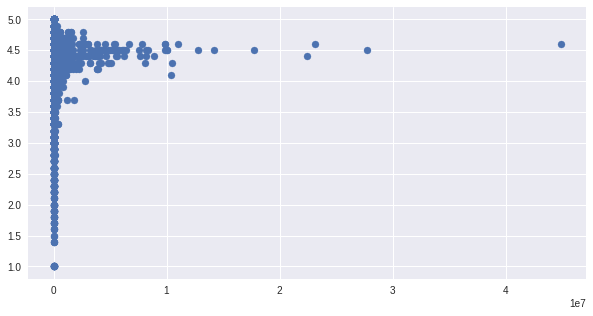

In [ ]:
# Reviews
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['Reviews'], y = continuous['Rating'])

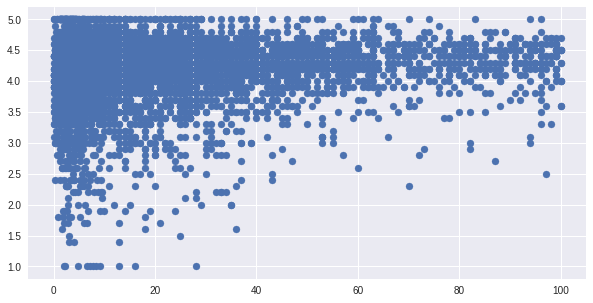

In [ ]:
# Size
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['Size'], y = continuous['Rating'])

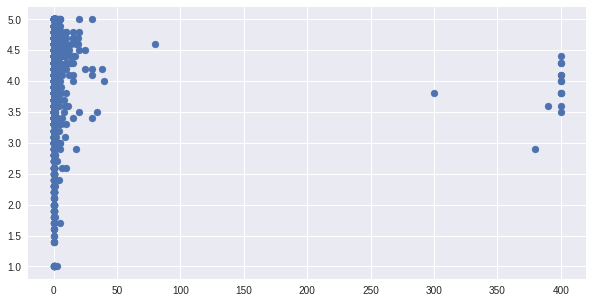

In [ ]:
# Price
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['Price'], y = continuous['Rating'])

IQR 기준이면 너무 많은 데이터를 이상치라고 판단하는 손실이 오므로, 눈으로 확인한 큰 outlier만 처리한다.


In [ ]:
out_installs = continuous[continuous['Installs'] > 200000000]
out_price = continuous[continuous['Price'] > 250]
out_reviews = continuous[continuous['Reviews'] > 15000000]
print(len(out_installs))
print(len(out_price))
print(len(out_reviews))

10
15
5


In [5]:
continuous.loc[continuous[continuous.Installs>200000000].index,'Installs'] = None
continuous.Installs = continuous.Installs.fillna(np.mean(continuous.Installs))

continuous.loc[continuous[continuous.Price>250].index,'Price'] = None
continuous.Price = continuous.Price.fillna(np.mean(continuous.Price))

continuous.loc[continuous[continuous.Reviews>15000000].index,'Reviews'] = None
continuous.Reviews = continuous.Reviews.fillna(np.mean(continuous.Reviews))

이상치는 제거하지 않고 평균값으로 대체해주어 데이터를 손실하지 않기로 한다.

In [6]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
scal_continuous = scal.fit_transform(continuous)

연속형 변수 scaling까지 마친다.

### 범주형 변수 확인  
Category, Content Rating, Genres 확인

In [ ]:
category_count = train['Category'].value_counts()
category_count

FAMILY                 1102
GAME                    657
TOOLS                   463
MEDICAL                 253
PERSONALIZATION         227
LIFESTYLE               220
FINANCE                 201
PHOTOGRAPHY             175
PRODUCTIVITY            173
HEALTH_AND_FITNESS      172
BUSINESS                166
COMMUNICATION           153
SPORTS                  143
SHOPPING                139
SOCIAL                  122
DATING                  121
NEWS_AND_MAGAZINES      114
BOOKS_AND_REFERENCE     109
TRAVEL_AND_LOCAL        108
VIDEO_PLAYERS            90
EDUCATION                88
MAPS_AND_NAVIGATION      76
FOOD_AND_DRINK           69
ENTERTAINMENT            64
ART_AND_DESIGN           57
LIBRARIES_AND_DEMO       57
AUTO_AND_VEHICLES        55
HOUSE_AND_HOME           48
COMICS                   46
PARENTING                43
WEATHER                  37
BEAUTY                   34
EVENTS                   34
Name: Category, dtype: int64

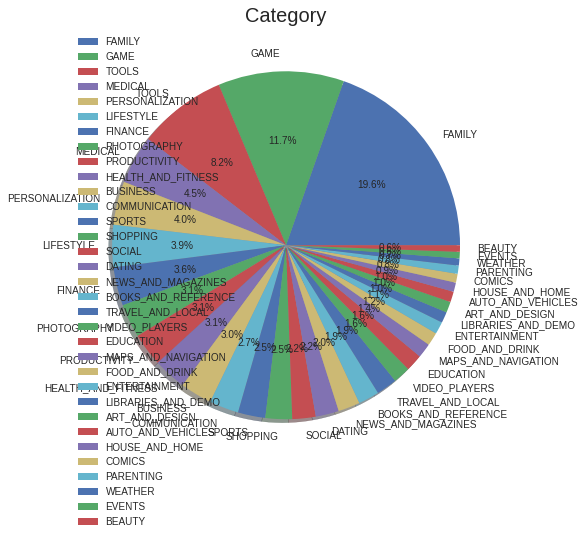

In [ ]:
# Category 시각화
fig = plt.figure(figsize=(16,8)) 
plt.pie(category_count,labels=category_count.index,autopct='%1.1f%%', shadow=True)
plt.title('Category',size = 20)
plt.legend()
plt.show()

In [ ]:
# extra = train['Category'].value_counts().keys()[train['Category'].value_counts()<100]
# for i in range(len(train)):
#     if train.Category[i] in extra:train.Category[i] = 'EXTRA'

# dummy1 = pd.get_dummies(train.Category)
# dummy1.drop(dummy1.columns[-1], axis=1, inplace=True) ## 범주를 구분해주도록 필요한 가변수의 개수는 범주개수-1이므로 하나 제거
# dummy1

Index(['BOOKS_AND_REFERENCE', 'BUSINESS', 'COMMUNICATION', 'DATING', 'EXTRA',
       'FAMILY', 'FINANCE', 'GAME', 'HEALTH_AND_FITNESS', 'LIFESTYLE',
       'MEDICAL', 'NEWS_AND_MAGAZINES', 'PERSONALIZATION', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS',
       'TRAVEL_AND_LOCAL'],
      dtype='object')

In [7]:
dummy1 = pd.get_dummies(train.Category)
dummy1.drop(train['Category'].value_counts().keys()[train['Category'].value_counts()<100], axis=1, inplace=True)
dummy1

,BOOKS_AND_REFERENCE,BUSINESS,COMMUNICATION,DATING,FAMILY,FINANCE,GAME,HEALTH_AND_FITNESS,LIFESTYLE,MEDICAL,NEWS_AND_MAGAZINES,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5612,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5613,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5614,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(train['Category'].value_counts().keys()[train['Category'].value_counts()>=100])

19

Category 변수는 해당 범주 데이터가 100개 미만인 경우 범주가 없는 경우로 취급하여, 전체 데이터를 더미화한 후 해당 칼럼을 삭제하였다.

이와 같이 더미화한 이유는, 100개 미만인 경우를 'EXTRA'로 변환하여 전체 더미화를 한 후에 EXTRA 칼럼을 없앤 것과 동일한 결과를 보여 더 간단한 방법을 택하였다.

EXTRA로 변환하면 총 범주 개수는 20개이지만, 범주를 구분해주도록 필요한 가변수의 개수는 범주개수-1이므로 EXTRA를 제거해도 무방하다.
Category에서 데이터가 100개 이상인 범주는 19개로 맞는 결과를 보여주고 있다.

In [ ]:
con_rating_count = train['Content Rating'].value_counts()
con_rating_count

Everyone           4531
Teen                589
Mature 17+          281
Everyone 10+        212
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

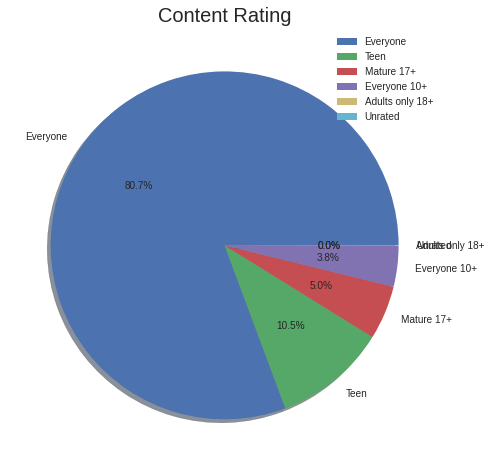

In [ ]:
# Content Rating 시각화
fig = plt.figure(figsize=(16,8)) 
plt.pie(con_rating_count,labels=con_rating_count.index,autopct='%1.1f%%', shadow=True)
plt.title('Content Rating',size = 20)
plt.legend()
plt.show()

In [8]:
dummy2 = pd.get_dummies(train['Content Rating'])
dummy2.drop(['Adults only 18+', 'Unrated'], axis=1, inplace=True)
dummy2

,Everyone,Everyone 10+,Mature 17+,Teen
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
5611,1,0,0,0
5612,1,0,0,0
5613,0,0,1,0
5614,1,0,0,0


Content Rating 변수는 극히 일부인 Adults only 18+과 Unrated만 제외하고 더미변수화하였다.

In [ ]:
genres_count = train['Genres'].value_counts()
genres_count

Tools                                    463
Entertainment                            337
Education                                309
Medical                                  253
Personalization                          227
Lifestyle                                219
Action                                   214
Finance                                  201
Photography                              175
Productivity                             173
Health & Fitness                         172
Business                                 166
Communication                            153
Sports                                   149
Shopping                                 139
Arcade                                   129
Social                                   122
Dating                                   121
News & Magazines                         114
Simulation                               110
Books & Reference                        109
Travel & Local                           107
Video Play

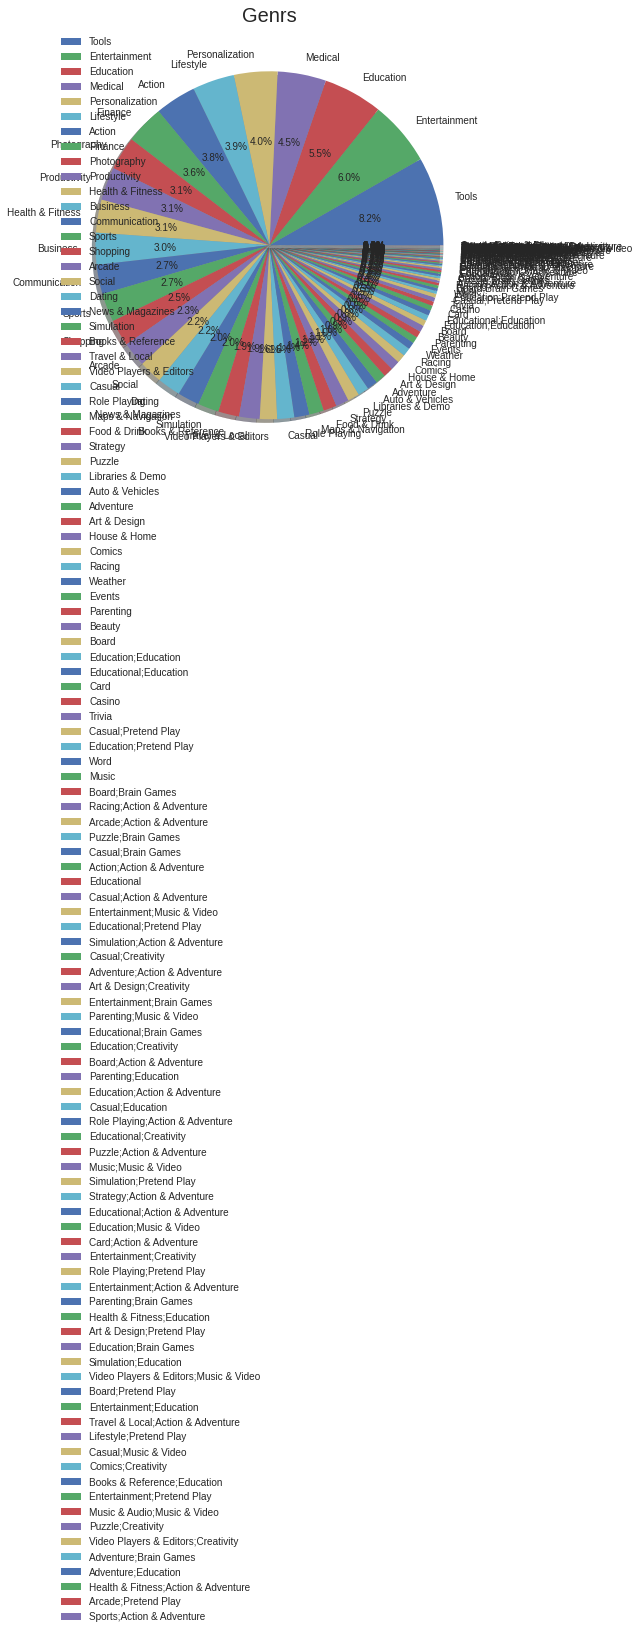

In [ ]:
# Genrs 시각화
fig = plt.figure(figsize=(16,8)) 
plt.pie(genres_count,labels=genres_count.index,autopct='%1.1f%%', shadow=True)
plt.title('Genrs',size = 20)
plt.legend()
plt.show()

Genres 변수는 범주가 너무 많아 학습에 큰 영향을 주지 못할 것이라 판단하여 더미화하지 않는다.

App, Id, Last Updeated 변수들은 행별 메타 데이터같은 역할이라 학습에 필요하지 않아 가져오지 않고, 스케일링한 연속형 변수와 더미변수, Type 변수만 X_train 데이터로 만든다.

In [9]:
X = pd.concat([pd.DataFrame(scal_continuous, columns=continuous.columns), train.Type, dummy1, dummy2], axis=1)
y = train.Rating

In [10]:
X

,Reviews,Size,Installs,Price,Type,BOOKS_AND_REFERENCE,BUSINESS,COMMUNICATION,DATING,FAMILY,FINANCE,GAME,HEALTH_AND_FITNESS,LIFESTYLE,MEDICAL,NEWS_AND_MAGAZINES,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,Everyone,Everyone 10+,Mature 17+,Teen
0,-0.196740,-0.124487,-0.288457,-0.165832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,-0.195640,-0.344337,-0.254237,-0.165832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.077741,-0.577377,0.060029,-0.165832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.096816,0.139332,3.202684,-0.165832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.195640,-0.836799,-0.282171,-0.165832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,-0.064528,-0.665317,-0.219318,-0.165832,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5612,-0.190802,0.842850,-0.219318,-0.165832,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5613,-0.196758,-0.696096,-0.288457,-0.165832,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5614,-0.192080,1.678277,-0.282171,-0.165832,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
y

0       4.1
1       3.9
2       4.7
3       4.5
4       4.3
       ... 
5611    4.1
5612    4.0
5613    4.3
5614    4.5
5615    4.6
Name: Rating, Length: 5616, dtype: float64

test 데이터도 X_train과 동일하게 전처리해준다.

In [11]:
test_id = test.Id

continuous = test[['Reviews','Size','Installs','Price']]
scal_continuous = scal.transform(continuous)
dummy1 = pd.get_dummies(test.Category)
dummy1.drop(['VIDEO_PLAYERS', 'MAPS_AND_NAVIGATION', 'FOOD_AND_DRINK', 'ART_AND_DESIGN', 'LIBRARIES_AND_DEMO',
       'AUTO_AND_VEHICLES', 'HOUSE_AND_HOME', 'COMICS', 'PARENTING', 'WEATHER', 'BEAUTY', 'EVENTS'], axis=1, inplace=True)
dummy2 = pd.get_dummies(test['Content Rating'])
test = pd.concat([pd.DataFrame(scal_continuous, columns=continuous.columns), test.Type, dummy1, dummy2], axis=1)
test

,Reviews,Size,Installs,Price,Type,BOOKS_AND_REFERENCE,BUSINESS,COMMUNICATION,DATING,FAMILY,FINANCE,GAME,HEALTH_AND_FITNESS,LIFESTYLE,MEDICAL,NEWS_AND_MAGAZINES,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,Everyone,Everyone 10+,Mature 17+,Teen
0,-0.195315,-0.770844,-0.282171,-0.165832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,-0.196593,-0.893960,-0.288457,-0.165832,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.196708,2.030036,-0.288457,-0.165832,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,-0.196853,-0.907151,-0.289085,2.097007,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,-0.196372,-0.432276,-0.288457,1.643532,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,-0.196897,-0.932697,-0.289085,-0.165832,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1400,-0.196947,-0.845593,-0.289120,-0.165832,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1401,-0.196905,1.370488,-0.288806,-0.165832,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1402,-0.196951,-0.801623,-0.289148,-0.165832,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## 3. Base Model Tuning


In [12]:
# sklearn 
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost
import lightgbm

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [14]:
# target 분리, data split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7)

In [15]:
n_folds = 5
# train = X
def rmse_cv(model):
  kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
  rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
  return (rmse)

In [16]:
def rmse(y,y_pred):
  return np.sqrt(mean_squared_error(y,y_pred))

In [17]:
lr = LinearRegression()
score = rmse_cv(lr)
print("\nLinear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Linear Regression score: 0.5361 (0.0143)



In [18]:
lasso = Lasso(alpha =0.005)
score = rmse_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.5372 (0.0155)



In [19]:
dt = DecisionTreeRegressor(max_depth=5)
score = rmse_cv(dt)
print("\nDecisionTree Regressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


DecisionTree Regressor score: 0.5304 (0.0127)



In [20]:
knn = KNeighborsRegressor(n_neighbors = 9)
score = rmse_cv(knn)
print("\nKNeighbors Regressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


KNeighbors Regressor score: 0.5540 (0.0153)



In [21]:
svm_lin = SVR(kernel='linear')
score = rmse_cv(svm_lin)
print("\nSVR linear score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


SVR linear score: 0.5467 (0.0170)



In [22]:
svm_rbf = SVR(kernel='rbf', gamma='scale')
score = rmse_cv(svm_rbf)
print("\nSVR rbf score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


SVR rbf score: 0.5406 (0.0184)



In [23]:
rf = RandomForestRegressor(n_estimators=100)
score = rmse_cv(rf)
print("\nRandomForest Regressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


RandomForest Regressor score: 0.5269 (0.0119)



In [24]:
gbm = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.05,
                                              min_samples_leaf=15, min_samples_split=10)
score = rmse_cv(gbm)
print("\nGradientBoosting Regressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


GradientBoosting Regressor score: 0.5111 (0.0124)



In [25]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.05)
score = rmse_cv(xgb)
print("\nXGB Regressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[07:09:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:09:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:09:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:09:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:09:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGB Regressor score: 0.5141 (0.0115)



In [26]:
lgb = lightgbm.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.05, n_estimators=500, feature_fraction=0.3) 
score = rmse_cv(lgb)
print("\nLGBM Regressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LGBM Regressor score: 0.5135 (0.0114)



베이스 모델 튜닝 결과 rmse가 작게 나온 decisiontree, randomforest, gradientboostingregressor, lgbmregressor를 선택하여 stacking을 진행한다. (xgb는 stacking 단계에서 계속 오류가 떠서 제외하고 그 다음으로 rmse가 낮은 모델을 선택하였다. 큰 차이는 없다.)

# 4. Stacking models   
basic & cv 기반

* Averaged base models class

In [27]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X_train, y_train):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X_test):
        predictions = np.column_stack([
            model.predict(X_test) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [28]:
averaged_models = AveragingModels(models = (rf,gbm,dt,lgb))

score = rmse_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.4153 (0.0132)



단순 평균 합산한 rmse 결과는 0.4153으로 나왔다. 하지만 이는 베이스 모델들의 예측값을 한 번 더 학습해서 예측한게 아닌 단순 평균 합산이기 때문에 온전한 Stacking이라고 보기에는 한계가 있다. 오히려 Voting에 가깝지 않나하는 생각이 든다.

* KFold 기반 Stacking

In [29]:
def get_stacking_data(model, X_train, y_train, X_test, n_folds=10):
  kfold = KFold(n_splits = n_folds, random_state = 1004)
  
  # 최종 모델에서 사용할 데이터 셋 세팅 (0 값으로)
  # 만약 shape가 (100,10)이었으면 폴드의 검증 과정 중 저장할 데이터는 (100,1)으로 한다.
  train_fold_predict = np.zeros((X_train.shape[0],1))
  # test 는 X_test 값을 이용해서 매 폴드마다 예측을 하기 때문에 (100, fold갯수) 모양이다.
  # 해당 폴드마다 X_test의 예측 값을 fold 에 넣는다! meta model 이 쓸꺼임
  test_predict = np.zeros((X_test.shape[0], n_folds))
  print('model : ',model.__class__.__name__)
  
  for cnt, (train_index, valid_index) in enumerate(kfold.split(X_train)):
    X_train_ = X_train.iloc[train_index]
    y_train_ = y_train.iloc[train_index]
    X_valid = X_train.iloc[valid_index]

    # 학습
    model.fit(X_train_,y_train_)
    # 해당 폴드에서 학습된 모델에다가 검증 데이터 (X_valid)로 예측 후 저장
    train_fold_predict[valid_index,:] = model.predict(X_valid).reshape(-1,1)
    # 해당 폴드에서 생성된 모델에게 원본 테스트 데이터 (X_test)를 이용해서 예측하고 저장
    test_predict[:,cnt] = model.predict(X_test)
  
  # for 문이 끝나면 test_pred는 평균을 내서 하나로 합친다.
  test_predict_mean = np.mean(test_predict, axis=1).reshape(-1,1)
  
  return train_fold_predict, test_predict_mean

In [30]:
# 앙상블 수행 gbm, dt, lgb ->  rf
gbm_train, gbm_test = get_stacking_data(gbm, X_train, y_train, X_test)
dt_train, dt_test = get_stacking_data(dt, X_train, y_train, X_test)
lgb_train, lgb_test = get_stacking_data(lgb, X_train, y_train, X_test)

model :  GradientBoostingRegressor
model :  DecisionTreeRegressor
model :  LGBMRegressor


In [31]:
# return 된 kfold 결과와 X_test 결과를 skacking
new_X_train = np.concatenate((gbm_train,dt_train,lgb_train), axis=1)
new_X_test = np.concatenate((gbm_test,dt_test,lgb_test), axis=1)

print('원본 : ', X_train.shape, X_test.shape)
print('새로운 : ', new_X_train.shape, new_X_test.shape)

원본 :  (3931, 28) (1685, 28)
새로운 :  (3931, 3) (1685, 3)


In [32]:
# 최종 모델 훈련
rf.fit(new_X_train,y_train)
stack_pred = rf.predict(new_X_test)

print("\n Final score: {:.4f}".format(rmse(y_test,stack_pred)))


 Final score: 0.5438


kfold 기반 stacking의 rmse는 0.5438로 나왔다.

* StackingAveragedModels  

In [33]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.iloc[train_index], y.iloc[train_index])
                y_pred = instance.predict(X.iloc[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model 
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [34]:
stacked_averaged_models = StackingAveragedModels(base_models = [dt, gbm, lgb],
                                                 meta_model = rf)

stacked_averaged_models.fit(X, y)
stacked_train_pred = stacked_averaged_models.predict(X)
stacked_pred = stacked_averaged_models.predict(test.values)
print(rmse(y, stacked_train_pred))

0.5182573478871911


In [35]:
stacked_averaged_models = StackingAveragedModels(base_models = [rf, gbm, lgb],
                                                 meta_model = dt)

stacked_averaged_models.fit(X, y)
stacked_train_pred = stacked_averaged_models.predict(X)
stacked_pred = stacked_averaged_models.predict(test.values)
print(rmse(y, stacked_train_pred))

0.4721957192341187


In [36]:
stacked_averaged_models = StackingAveragedModels(base_models = [rf, dt, lgb],
                                                 meta_model = gbm)

stacked_averaged_models.fit(X, y)
stacked_train_pred = stacked_averaged_models.predict(X)
stacked_pred = stacked_averaged_models.predict(test.values)
print(rmse(y, stacked_train_pred))

0.4485692111115051


In [48]:
stacked_averaged_models = StackingAveragedModels(base_models = [rf, gbm, dt],
                                                 meta_model =lgb)

stacked_averaged_models.fit(X, y)
stacked_train_pred = stacked_averaged_models.predict(X)
stacked_pred = stacked_averaged_models.predict(test.values)
print(rmse(y, stacked_train_pred))

0.44141224063962203


base model을 rf, gbm, dt로 두고 meta model을 lgb로 두는 게 0.4414로 가장 낮은 rmse를 보였다.

* sklearn.ensemble.StackingRegressor  
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html

In [38]:
from sklearn.ensemble import StackingRegressor

In [39]:
# 파라미터 설정
estimators = [
              ('rf',rf),
              ('gbm',gbm),
              ('dt',dt)
]
              
# Stacking
reg = StackingRegressor(
    estimators = estimators,
    final_estimator = lgb,
    cv = 10,
    n_jobs=3,
    verbose=3
    )

# fit
reg.fit(X_train, y_train)

StackingRegressor(cv=10,
                  estimators=[('rf',
                               RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_

In [40]:
# rmse
rmse(y_test,reg.predict(X_test))

0.522467965153284

StackingRegressor를 통한 stacking의 rmse는 0.5225로 나왔다. 똑같은 베이스 모델을 사용한 결과이니 StackingRegressor보단 앞의 meta model 구현 클래스(StackingAveragedModels)로 Stacking 하는 것이 더 좋은 성능을 보이고 있다고 판단한다.

* Stacking with gridsearch

In [42]:
# from sklearn.model_selection import GridSearchCV

# reg1 = DecisionTreeRegressor()
# reg2 = RandomForestRegressor(n_estimators=1000)
# reg3 = GradientBoostingRegressor(n_estimators = 1000)

# estimators = [
#               ('reg1',reg1),
#               ('reg2',reg2),
#               ('reg3',reg3)
# ]

# sreg = StackingRegressor(estimators=estimators, 
#                             final_estimator=lgb, cv = 10,  n_jobs=3, verbose=3)

# params = {'DecisionTreeRegressor__max_depth': [5, 10],
#           'GradientBoostingRegressor__learning_rate':[0.05, 0.005],
#           'GradientBoostingRegressor__min_samples_leaf':[10,50,100],
#           'GradientBoostingRegressor__min_samples_split':[10,50,100]
#           }

# grid = GridSearchCV(estimator=sreg, 
#                     param_grid=params, 
#                     cv=5,
#                     refit=True)
# grid.fit(X, y)

# print('Best parameters:', grid.best_params_)

In [43]:
reg1 = DecisionTreeRegressor()
param = {'max_depth':[5,10]}
reg1 = GridSearchCV(reg1, param, cv=5)
reg1.fit(X, y)

print("best parameters : ", reg1.best_params_)

best parameters :  {'max_depth': 5}


In [ ]:
reg2 = RandomForestRegressor()
param = {'n_estimators':[100,1000]}
reg2 = GridSearchCV(reg2, param, cv=5)
reg2.fit(X, y)

print("best parameters : ", reg2.best_params_)

best parameters :  {'n_estimators': 1000}


In [ ]:
reg3 = GradientBoostingRegressor(n_estimators = 1000)
param = {'learning_rate':[0.05,0.005], 'min_samples_leaf':[15,30], 'min_samples_split':[10,20]}
reg3 = GridSearchCV(reg3, param, cv=5)
reg3.fit(X, y)

print("best parameters : ", reg3.best_params_)

best parameters :  {'learning_rate': 0.005, 'min_samples_leaf': 30, 'min_samples_split': 20}


In [44]:
reg1 = DecisionTreeRegressor(max_depth=5)
reg2 = RandomForestRegressor(n_estimators=1000)
reg3 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.005, min_samples_leaf=30, min_samples_split=20)

In [45]:
estimators = [
              ('reg1',reg1),
              ('reg2',reg2),
              ('reg3',reg3)
]

sreg = StackingRegressor(estimators=estimators, final_estimator=lgb, cv = 10,  n_jobs=3, verbose=3)

sreg.fit(X_train, y_train)

rmse(y_test,sreg.predict(X_test))

0.5283419347036113

gridSearch에 의한 best parameter로 돌려봐도 rmse가 크게 낮아지지 않으므로, 앞의 meta model 클래스(StackingAverageModels)로 Stacking 한 예측값을 최종 제출로 결정한다.

In [ ]:
# stacked_averaged_models = StackingAveragedModels(base_models = [rf, gbm, dt],
#                                                  meta_model =lgb)

# stacked_averaged_models.fit(X, y)
# stacked_train_pred = stacked_averaged_models.predict(X)
# stacked_pred = stacked_averaged_models.predict(test.values)
# print(rmse(y, stacked_train_pred))

0.44141224063962203


# 5. Final Training and Prediction  


* Ensemble prediction

In [49]:
ensemble = stacked_pred

* Submission

In [50]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['Rating'] = ensemble
sub.to_csv('submission.csv',index=False)

In [ ]:
sub.head()

,Id,Rating
0,5617,4.017166
1,5618,4.195670
2,5619,3.900068
3,5620,3.837866
4,5621,4.208459
